### 单因素方差分析

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#构造数据
F=[1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]
S=[57,66,49,40,34,53,44,68,39,29,45,56,51,31,49,21,34,40,44,51,65,77,58]

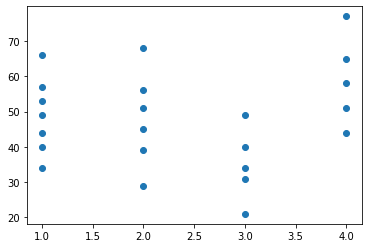

In [125]:
plt.scatter(F,S)

In [126]:
import pandas as pd
#数据组合
data=[F]+[S]
df=pd.DataFrame(np.array(data).T,columns=["F","S"])

In [127]:
#求各组均值
avg=df.groupby(["F"])["S"].mean()
avg.index

Int64Index([1, 2, 3, 4], dtype='int64', name='F')

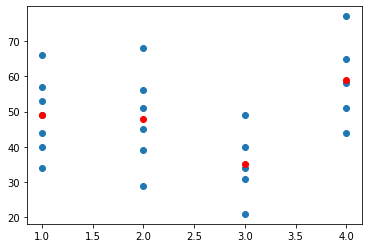

In [128]:
plt.scatter(df["F"],df["S"])
plt.scatter(avg.index,avg,color='red')

In [129]:
#去重方法set函数
set(F)

{1, 2, 3, 4}

In [130]:
#list根据值计数
F.count(1)

7

In [131]:
#利用where函数定位各组值
x=np.array(F)
np.where(x==2,S,0)

array([ 0,  0,  0,  0,  0,  0,  0, 68, 39, 29, 45, 56, 51,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [132]:
y=list(np.where(x==2,S,0))
y

[0, 0, 0, 0, 0, 0, 0, 68, 39, 29, 45, 56, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [133]:
#利用where函数取各组值
np.array(S)[np.where(y)]

array([68, 39, 29, 45, 56, 51])

In [134]:
#求第i组和
sum(np.where(x==2,S,0))

288

In [135]:
def SSE(a,b):
    s=0
    A=np.array(a)
    #总体均值
    avg_t=np.mean(b)
    for x in set(a):
        #先求组内均值
        avg_i=sum(np.where(A==x,b,0))/a.count(x)
        s=s+a.count(x)*pow(avg_i-avg_t,2)
    return s

In [136]:
SSE(F,S)/3

485.536231884058

In [137]:
def SSA(a,b):
    s=0
    A=np.array(a)
    for x in set(a):
        #先求组内均值
        avg_i=sum(np.where(A==x,b,0))/a.count(x)
        #取出第i组的值
        B=np.array(S)[np.where(list(np.where(A==x,b,0)))]
        #print(B)
        for y in B:
            s=s+pow(y-avg_i,2)
            
    return s

In [138]:
SSA(F,S)/19

142.52631578947367

In [139]:
def F_s(a,b):
    k=len(set(a))
    n=len(a)
    f=(SSE(F,S)/(k-1))/(SSA(F,S)/(n-k))
    return f

In [140]:
F_s(F,S)

3.4066426904716036

### 多因素方差分析

In [141]:
# # 呷哺呷哺2个因素：环境等级，食材等级
from scipy import stats  
import pandas as pd  
import numpy as np  
from statsmodels.formula.api import ols  
from statsmodels.stats.anova import anova_lm  

  
environmental =  [5,5,5,5,5,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1]       
ingredients    = [5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1]    
score      =     [5,5,4,3,2,5,4,4,3,2,4,4,3,3,2,4,3,2,2,2,3,3,3,2,1]  
  
data = {'E':environmental, 'I':ingredients, 'S':score}  
df = pd.DataFrame(data)  
df.head()

,E,I,S
0,5,5,5
1,5,4,5
2,5,3,4
3,5,2,3
4,5,1,2


符号意义：

-  （~）隔离因变量和自变量 (左边因变量，右边自变量 )  
-  （+）分隔各个自变量
-  （:）表示两个自变量交互影响  

In [142]:
formula = 'S~E+I+E:I'                           
                                                 
model = ols(formula,df).fit()                   
results = anova_lm(model)                       
print (results)  

            df  sum_sq    mean_sq           F        PR(>F)
E          1.0    7.22   7.220000   54.539568  2.896351e-07
I          1.0   18.00  18.000000  135.971223  1.233581e-10
E:I        1.0    0.64   0.640000    4.834532  3.924030e-02
Residual  21.0    2.78   0.132381         NaN           NaN


E和I对结果有显著影响，之间有交互